<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/time_series%2Bwith_exogenous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/competitions/bike-sharing-demand/data

In [1]:

!pip install pycaret
!pip install pycaret[mlops]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [23]:

import pandas as pd
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
from google.colab import files
uploaded_files = files.upload()
data = pd.read_csv('train.csv')
print(f"Successfully loaded {len(data)} rows.")


Saving train.csv to train (3).csv
Successfully loaded 10886 rows.


In [24]:
data.drop_duplicates(keep = False)
data["index"] = pd.to_datetime(data["datetime"])
data.set_index("index", inplace = True)
data = data.reset_index().drop_duplicates(subset='index').set_index('index')
data = data.asfreq('H')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
index,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
2011-01-01 01:00:00,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2011-01-01 02:00:00,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
2011-01-01 03:00:00,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0
2011-01-01 04:00:00,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1.0


In [ ]:
data = data.drop(["datetime"], axis = 1)
data.head()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17256 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Freq: H
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  float64
 2   holiday     10886 non-null  float64
 3   workingday  10886 non-null  float64
 4   weather     10886 non-null  float64
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  float64
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.7+ MB


In [30]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
index,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0
2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1.0


In [41]:
# Try setting up the experiment again, but this time handle missing values
BEST = setup(data, target = 'count', fh = 12, numeric_imputation_target = 'ffill', enforce_exogenous=False, numeric_imputation_exogenous = 'ffill', use_gpu = True)
# Handle missing values in exogenous variables by forward filling

,Description,Value
0,session_id,579
1,Target,count
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(17256, 11)"
5,Transformed data shape,"(17256, 11)"
6,Transformed train set shape,"(17244, 11)"
7,Transformed test set shape,"(12, 11)"
8,Rows with missing values,36.9%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

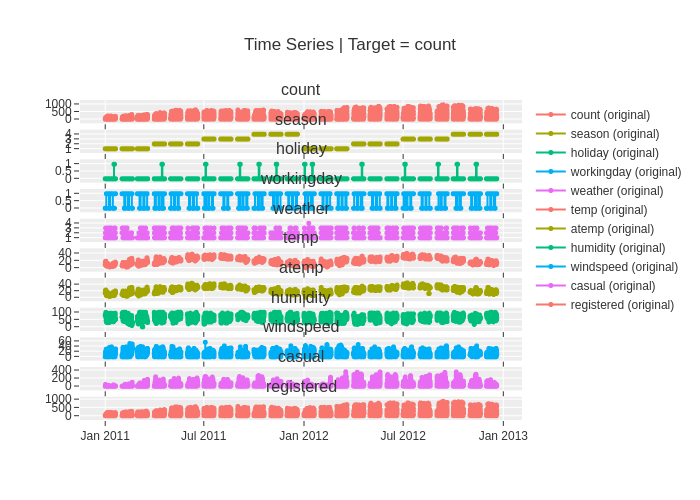

In [35]:
plot_model(plot = 'ts')

In [37]:
plot_model(plot = 'diff')

<Axes: xlabel='index'>

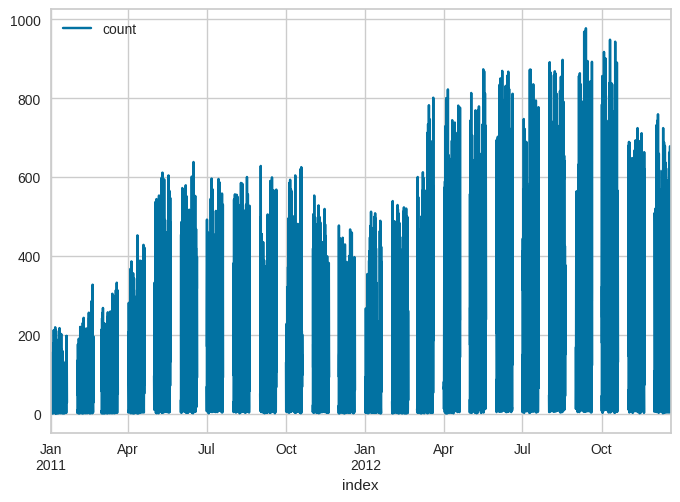

In [44]:
data.plot(y='count')

In [50]:
model = create_model('prophet')
prediction = predict_model( model,fh = 12)
prediction

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2012-12-17 23:00,0.0001,0.0001,0.0068,0.0068,0.0004,0.0004,1.0000
1,2012-12-18 11:00,0.0002,0.0001,0.0073,0.0074,0.0000,0.0000,1.0000
2,2012-12-18 23:00,0.0001,0.0001,0.0055,0.0059,0.0005,0.0005,1.0000
Mean,NaT,0.0001,0.0001,0.0065,0.0067,0.0003,0.0003,1.0000
SD,NaT,0.0000,0.0000,0.0008,0.0006,0.0002,0.0002,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn1dt0tj/7uszk54o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn1dt0tj/b_g__h1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4630', 'data', 'file=/tmp/tmpvn1dt0tj/7uszk54o.json', 'init=/tmp/tmpvn1dt0tj/b_g__h1o.json', 'output', 'file=/tmp/tmpvn1dt0tj/prophet_model04g3i6xm/prophet_model-20240922165101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn1dt0tj/gh_ftebq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn1dt0tj/0lsygy_2.json
DEBUG:cmdstanpy:idx 0
DEBU

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Prophet,0.0005,0.0003,0.0255,0.0257,0.0001,0.0001,1.0000


,y_pred
2012-12-19 12:00,235.9761
2012-12-19 13:00,212.9724
2012-12-19 14:00,217.9725
2012-12-19 15:00,236.9747
2012-12-19 16:00,333.9766
2012-12-19 17:00,561.9796
2012-12-19 18:00,568.9794
2012-12-19 19:00,335.9780
2012-12-19 20:00,240.9708
2012-12-19 21:00,167.9701


from matplotlib import pyplot as plt
prediction['y_pred'].plot(kind='hist', bins=20, title='y_pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction['y_pred'].plot(kind='line', figsize=(8, 4), title='y_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

In [57]:
print(data.index.min())
print(data.index.max())

2011-01-01 00:00:00
2012-12-19 23:00:00


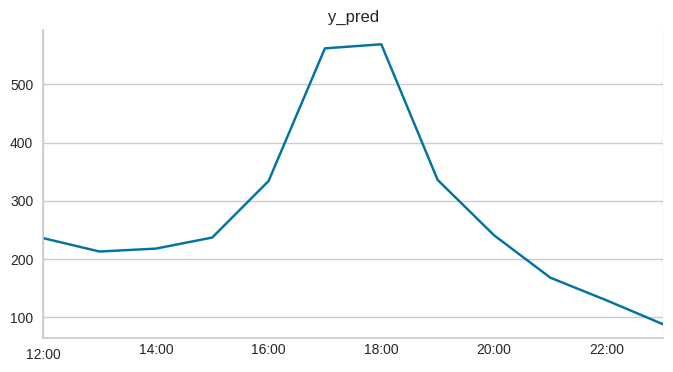

In [52]:
from matplotlib import pyplot as plt
prediction['y_pred'].plot(kind='line', figsize=(8, 4), title='y_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

In [60]:
savedmodel = save_model(model, 'time_series_with_exogenuous')
savedmodel

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('transformer_exogenous',
                             TransformerPipeline(steps=[('numerical_imputer',
                                                         Imputer(method='ffill',
                                                                 random_state=579))])),
                            ('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(method='ffill',
                                                                                                     random_state=579))])),
                                                                ('model',
                                                                 ProphetPeriodPatched())]))]),
 'time_series_with_exogenuous.pkl')